In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!ls

learning_experiment.ipynb  scaling_data_system2.csv	     system_info.ipynb
run_experiments.ipynb	   scaling_experiment.ipynb	     threads.pdf
scaling_analysis.ipynb	   scaling.pdf
scaling_data_system1.csv   single_experiment_analysis.ipynb


In [3]:
path = '/home/garg1/logs/pytorch_seed_rl/learning_system_2/csv/'
#path = 'pytorch_seed_rl/scaling_experiment/a_01_p_1_n_004/csv/'

In [4]:
eps_df = pd.read_csv(path + 'episodes.csv')

In [5]:
eps_df = eps_df.sort_values('training_steps')

In [6]:
# eps_df = eps_df[eps_df['episode_id']< 75000]

In [7]:
eps_df.tail()

,episode_id,return,length,training_steps
480458,15270.0,2.0,104,49998080.0
480449,15201.0,5.0,127,49998080.0
480448,15223.0,2.0,119,49998080.0
480464,15007.0,5.0,213,49998080.0
480469,15357.0,1.0,68,49998080.0


In [8]:
eps_df['count'] = eps_df.groupby(['training_steps'])['episode_id'].agg('count')

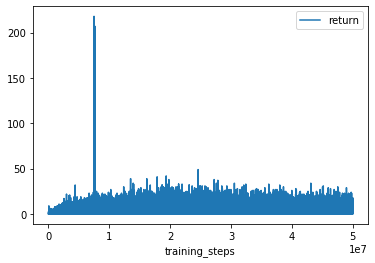

In [9]:
eps_df.plot(x='training_steps', y='return')

eps_df.plot(x='episode_id', y='length')

In [10]:
t_df = pd.read_csv(path + 'training.csv')

In [11]:
t_df

,runtime,training_time,training_epoch,training_steps,total_loss,pg_loss,baseline_loss,entropy_loss
0,16.378516,0.0,1,640,-8.812935,-0.610352,0.448178,-842.667236
1,16.408226,0.0,2,1280,-9.849949,-1.568076,0.287468,-842.560791
2,16.437268,0.0,3,1920,-6.215840,2.105001,0.203762,-842.272339
3,16.467986,0.0,4,2560,-7.854550,0.509887,0.118102,-842.348877
4,16.539434,0.0,5,3200,-6.613726,1.769937,0.082706,-842.501648
...,...,...,...,...,...,...,...,...
78121,56630.022158,0.0,78122,49998080,-4.667934,-0.211182,5.110853,-701.217896
78122,56632.230089,0.0,78123,49998720,2.773890,0.295026,19.041729,-704.200012
78123,56632.360904,0.0,78124,49999360,-10.054674,-7.330674,8.554561,-700.128113
78124,56633.289870,0.0,78125,50000000,-1.564484,1.640993,7.121736,-676.634583


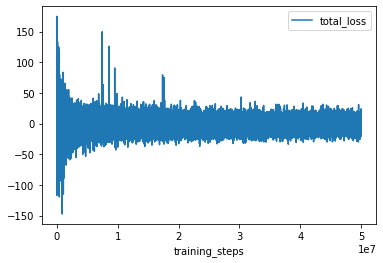

In [12]:
t_df.plot(x='training_steps', y='total_loss')

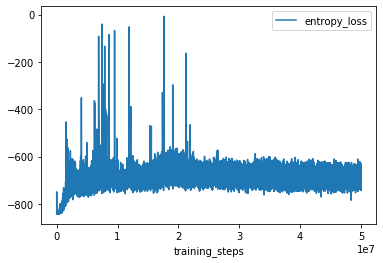

In [13]:
t_df.plot(x='training_steps', y='entropy_loss')

In [14]:
t_df['entropy_loss'].mean()

-693.4883120736289

In [15]:
t_df['pg_loss'].mean()

-1.8517537824010382

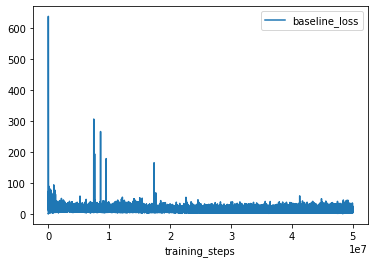

In [16]:
t_df.plot(x='training_steps', y='baseline_loss')

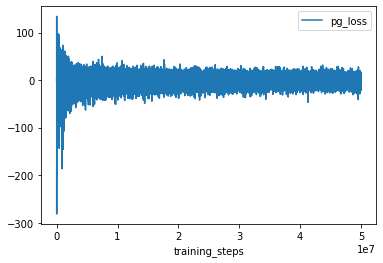

In [17]:
t_df.plot(x='training_steps', y='pg_loss')

In [18]:
s_df = pd.read_csv(path + 'system.csv')
# s_df = pd.read_csv('pytorch_seed_rl/scaling_experiment/a_01_p_1_n_004/csv/system.csv')

In [19]:
s_df

,runtime,trajectories_seen,episodes_seen,mean_inference_latency,fetching_time,inference_time,inference_steps,training_time,training_steps,queue_batches,queue_drops,queue_rpcs,queue_storing
0,14.313138,0,0,0.000000,0.0,0.563433,5440,0.0,0,0,0,0,1024
1,16.379754,139,0,0.000000,0.0,0.600129,6144,0.0,640,3,0,128,1024
2,16.409294,143,0,0.000000,0.0,0.600129,6144,0.0,1280,2,0,128,1024
3,16.438327,147,0,0.000000,0.0,0.600129,6144,0.0,1920,1,0,128,1024
4,16.469288,151,0,0.000000,0.0,0.600129,6144,0.0,2560,0,0,128,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78155,56629.884707,2499878,480401,0.007997,0.0,56.939689,50003456,0.0,49997440,0,0,128,1024
78156,56630.023215,2499904,480405,0.007999,0.0,56.942648,50003584,0.0,49998080,0,0,0,1024
78157,56632.231461,2499942,480410,0.008002,0.0,56.983623,50005632,0.0,49998720,0,0,128,1024
78158,56632.362019,2499968,480415,0.008005,0.0,56.989445,50005760,0.0,49999360,0,0,0,1024


In [20]:
s_df['t_fps'] = s_df['training_steps']/s_df['runtime']
s_df['i_fps'] = s_df['inference_steps']/s_df['runtime']

In [21]:
s_df.iloc[-1]['i_fps'], s_df.iloc[-1]['t_fps']

(882.9893098915325, 882.872911926824)

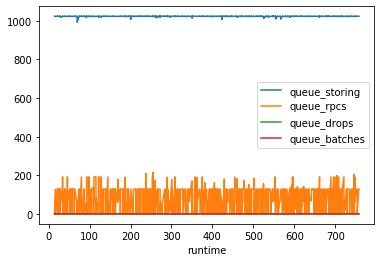

In [22]:
s_df[:1000].plot(x='runtime', y=['queue_storing', 'queue_rpcs', 'queue_drops','queue_batches'])

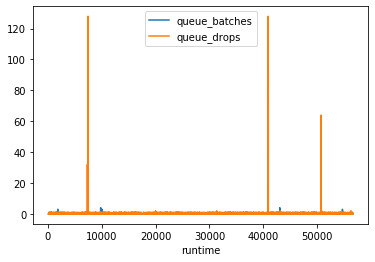

In [23]:
s_df[100:].plot(x='runtime', y=['queue_batches','queue_drops'])

In [24]:
s_df[['queue_storing','queue_rpcs', 'queue_drops','queue_batches', 'mean_inference_latency']][-1000:].mean()

queue_storing             1023.640000
queue_rpcs                  86.949000
queue_drops                  0.012000
queue_batches                0.000000
mean_inference_latency       0.006509
dtype: float64

In [25]:
s_df = s_df.rename(columns={
    'runtime': 'Runtime [s]',
    'i_fps': 'Inference',
    't_fps': 'Training',
})

Text(0, 0.5, 'Frames per second')

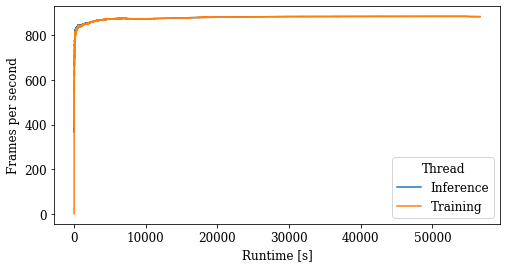

In [26]:
plt.rcParams.update({'font.size': 12,
                     'font.family': "serif"})
s_df.plot(x='Runtime [s]', y=['Inference', 'Training'], figsize=(8,4))
plt.legend(title='Thread')
plt.ylabel('Frames per second')
# plt.savefig('threads.pdf')

In [27]:
eps_df = eps_df.rename(columns={
    'training_steps': 'Training steps',
    'return': 'Return',
})

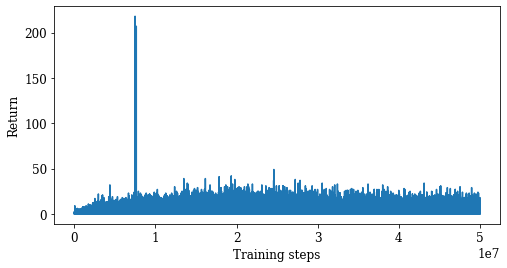

In [32]:
eps_df.plot(x='Training steps', y='Return', legend=False, figsize=(8,4))
plt.ylabel('Return')
#plt.savefig('learning.pdf')